<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-lightcurves-tess-cdips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

# TESS lightcurves from CDIPS pipeline

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## CDIPS class

Query CDIPS lightcurve using the CDIPS class

In [3]:
#instantiate CDIPS class
cdips = cr.CDIPS(ticid=460205581, 
                 sector=10, 
                 aper_idx=3, 
                 lctype='flux', 
                 verbose=False
                )

There are 2 gaia sources within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec
Gaia and TIC catalog cross-match succeeded.
Found 2 CDIPS lightcurves.


In [4]:
##cdips target header
cdips.header0[:10]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CAMERA  =                    3 / Camera number                                  
CCD     =                    1 / CCD chip number                                
FRAMETIM=                  2.0 / [s] frame time (INT_TIME + READTIME)           
INSTRUME= 'TESS Photometer'    / detector type                                  
INTTIME =                 1.98 / [s] photon accumulation time per frame         
NREADOUT=                  720 / number of read per cadence                     

In [5]:
#cdips lightcurve header
cdips.header[8:-37:2]

TTYPE1  = 'BGE     '           / Background measurement error                   
TTYPE2  = 'BGV     '           / Background value (after bkgd surface subtrxn)  
TTYPE3  = 'FDV     '           / Measured D value (see Pal 2009 eq 31)          
TTYPE4  = 'FKV     '           / Measured K value (see Pal 2009 eq 31)          
TTYPE5  = 'FSV     '           / Measured S value (see Pal 2009 eq 31)          
TTYPE6  = 'IFE1    '           / Flux error in aperture 1 (ADU)                 
TTYPE7  = 'IFE2    '           / Flux error in aperture 2 (ADU)                 
TTYPE8  = 'IFE3    '           / Flux error in aperture 3 (ADU)                 
TTYPE9  = 'IFL1    '           / Flux in aperture 1 (ADU)                       
TTYPE10 = 'IFL2    '           / Flux in aperture 2 (ADU)                       
TTYPE11 = 'IFL3    '           / Flux in aperture 3 (ADU)                       
TTYPE12 = 'IRE1    '           / Instrumental mag error for aperture 1          
TTYPE13 = 'IRE2    '        

In [6]:
#catalog reference(s) which claimed cluster membership
cdips.catalog_ref

'Kharchenko2013,Kounkel_2019,CantatGaudin_2018,GaiaCollaboration2018_tab1a'

In [7]:
#star name(s) in catalog ref
cdips.catalog_gaiaids

'786691642,5251470948229949568,5251470948229949568,5251470948229949568'

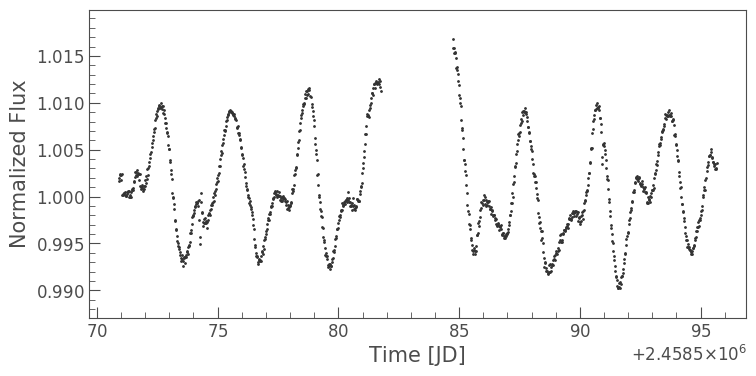

In [8]:
cdips.lc.scatter()

Text(0.5, 1.0, 'TIC 460205581 (sector 10)')

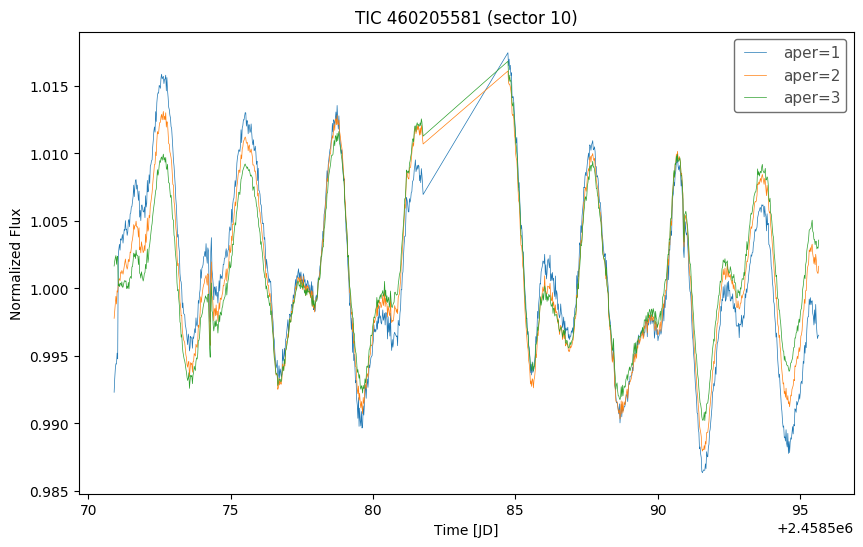

In [9]:
#vary aperture using index 1,2,3

cdips_lcs = {}
fig, ax = pl.subplots(1,1, figsize=(10,6))
for aper in [1,2,3]:
    lc = cdips.get_cdips_lc(aper_idx=aper)
    lc.plot(ax=ax, label=f'aper={aper}')
    cdips_lcs[aper] = lc
ax.set_title(f'TIC {cdips.ticid} (sector {lc.sector})')

## See also
* examples-lightcurves-tess-pathos.ipynb